### Workshop - Decision Trees

This workshop deals with understanding the working of decision trees.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

## **Problem Statement**:

With the help of Iris Data set we have to predict the flower is belongs to which category.

## **Import Libraries**

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets



## **Getting  Data**

In [2]:
# Load the iris dataset
iris_data=pd.read_csv('Iris.csv')
iris_data.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Additional Details of Data**

In [3]:
iris_data.drop(['Id'],axis=1,inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


__Data set size__

In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###**Missing Values**

In [7]:
iris_data.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Observation**:In the given dataset there is no missing values.

## **Data Visualization**

###**Pair Plot**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


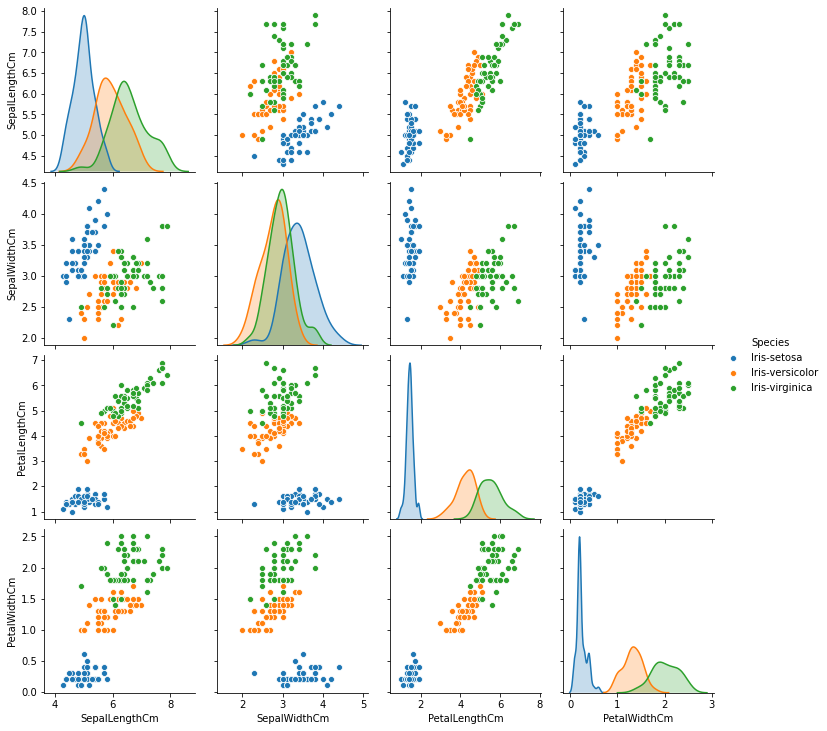

In [9]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(iris_data,hue="Species")


**Observation**: In the above figure we can see that we can easily separate Iris-setosa flower with the help of PetalWidthCm and PetalLengthCm features. But there is no pair is avaialable to separate Iris-versicolor and Iris-virginica.

###**Pearson Correlation**




In [10]:
iris_df=iris_data.drop(['Species'],axis=1)

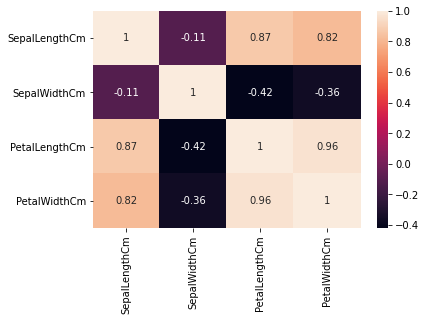

In [11]:
import seaborn as sns
sns.heatmap(iris_df.corr(method ='pearson'), annot = True)


**Observation**: In the above figure we can see that we can see that PetalWidthCm and PetalLengthCm features has high Correaltion that means this features are highly correlated with each other.

###**Box-plots**

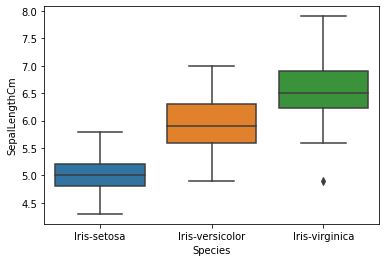

In [12]:
ax = sns.boxplot(x="Species", y="SepalLengthCm",data=iris_data)

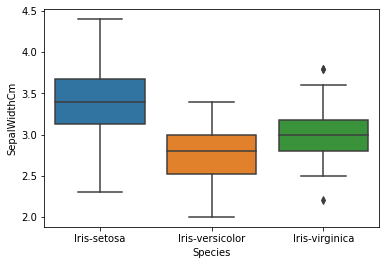

In [13]:
ax = sns.boxplot(x="Species", y="SepalWidthCm",data=iris_data)

**Observation**: In the above 2 figures we can't separate any flower because they are overlapping with other.

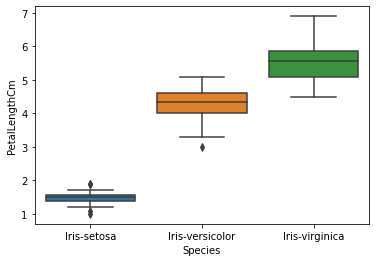

In [14]:
ax = sns.boxplot(x="Species", y="PetalLengthCm",data=iris_data)

**Observation**: In the above figure we can see that we can easily separate Iris-setosa flower with the help of  PetalLengthCm feature. 

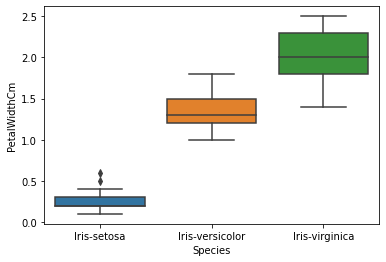

In [15]:
ax = sns.boxplot(x="Species", y="PetalWidthCm",data=iris_data)

**Observation**: In the above figure we can see that we can easily separate Iris-setosa flower with the help of PetalWidthCm feature. 

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

##**Train Test Split**

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_data,iris_data['Species'], random_state=0,test_size=0.3)


In [17]:
X_train.drop(['Species'],axis=1,inplace=True)
X_test.drop(['Species'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


###**Hyper Parameter Tunning Through Grid Search**

In [18]:
#Find out Max Depth and Min Sample Split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.metrics import accuracy_score  
parameters={'min_samples_split' : [5,10,100,5000],'max_depth': [1,5,10,50,100,500,1000]}
model = GridSearchCV(DecisionTreeClassifier(class_weight='balanced',random_state=0),parameters, scoring = 'accuracy',return_train_score=True, cv=5)
model.fit(X_train, y_train)

print(model.best_params_)

{'max_depth': 5, 'min_samples_split': 5}


### **Best Parameters**

In [19]:
dtree = DecisionTreeClassifier(max_depth =5,min_samples_split=5,random_state = 0)
dtree.fit(X_train, y_train)
pred_test=dtree.predict(X_test)


### **Actual Class Vs Predicted Class**

In [20]:
df=pd.DataFrame({'Actual_Class':y_test,'Predicted_Class':pred_test})
df

,Actual_Class,Predicted_Class
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
100,Iris-virginica,Iris-virginica
40,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor


### **Confusion Matrix**

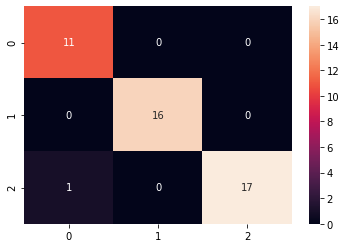

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,pred_test,labels=['Iris-virginica','Iris-setosa','Iris-versicolor']), annot=True)


### **Classification Report Related to Precision, Recall, F1-Score**

In [22]:
from sklearn.metrics import classification_report 
target_names =['Iris-virginica','Iris-setosa','Iris-versicolor']

print(classification_report(y_test,pred_test, target_names=target_names))

                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00        16
    Iris-setosa       1.00      0.94      0.97        18
Iris-versicolor       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [23]:
print("Accuracy of Decision Tree on Best Parameters",accuracy_score(y_test,pred_test))

Accuracy of Decision Tree on Best Parameters 0.9777777777777777


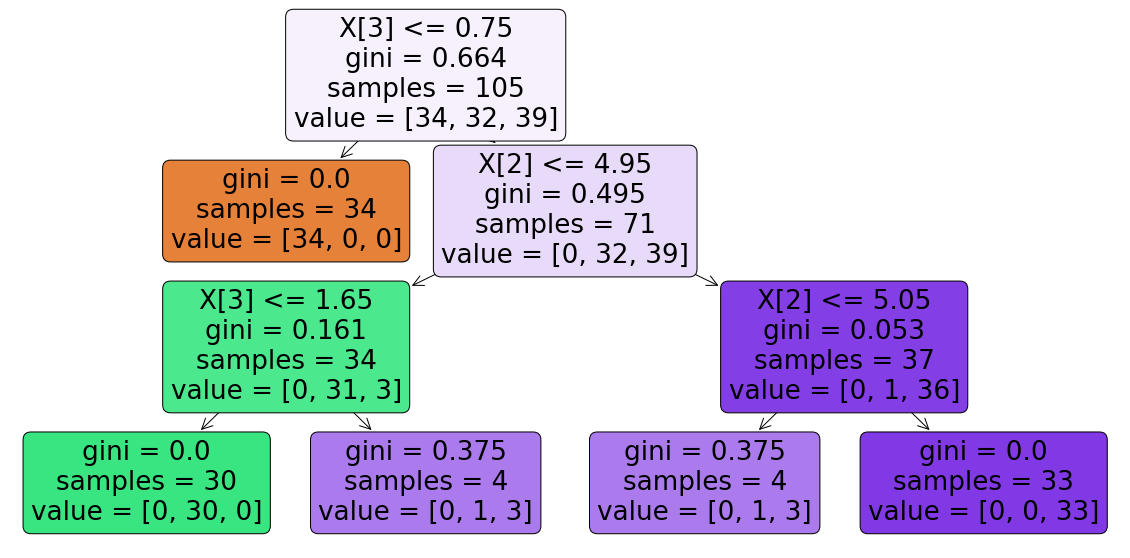

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dtree,rounded=True,filled=True)
plt.show()